In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np 

/tmp/ipykernel_57476/1386958429.py:10: RuntimeWarning: invalid value encountered in sqrt
  dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
/tmp/ipykernel_57476/1386958429.py:10: RuntimeWarning: invalid value encountered in power
  dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
/tmp/ipykernel_57476/1386958429.py:10: RuntimeWarning: invalid value encountered in log
  dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1606435118916D+01   r2 =                  NaN


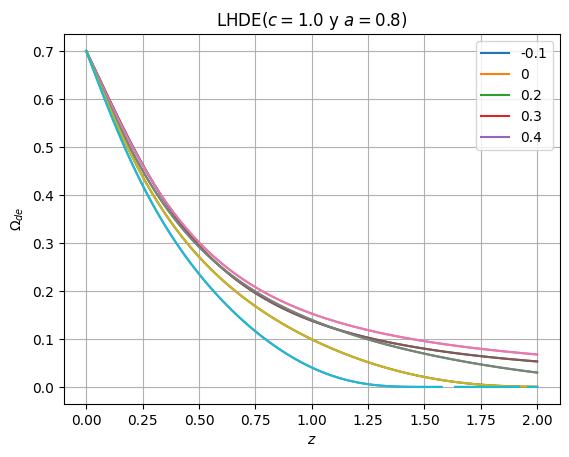

In [160]:
H0 = 70 
z_rs = np.linspace(0,2,100)
Om0 = 0.3 
Ode0 = 0.7 
b1 =  [-0.1,0,0.2,0.3,0.4]
def fun_linear(Omega, z,b, c=1.0, a=0.8):
    f = a + b*z
    f_prim =  b
    Q = c**2/(Om0*(1+z)**3)*(H0**2)
    dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
    return dOmega


solutions_linear = []
for b in b1:
    sol = odeint(fun_linear, Ode0,z_rs, args=(b,))
    solutions_linear.append(sol)

solutions_linear_reshaped = []
for sol in solutions_linear:
    solutions_linear_reshaped.append(sol[:, 0].reshape(-1))


for sol_reshaped in solutions_linear_reshaped:
    plt.plot(z_rs, sol_reshaped)


for sol_reshaped in solutions_linear_reshaped:
    plt.plot(z_rs, sol_reshaped)


plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('LHDE($c = 1.0$ y $a=0.8$)')
plt.legend(b1)
plt.grid(True)
plt.show()

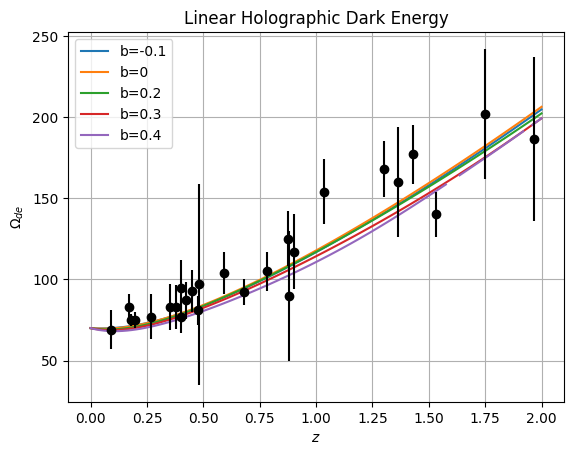

In [161]:
arr_hub = np.loadtxt('/home/alfonsozapata/Documents/HolographicDE/HolographicDE/Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

# Define the parameters
Om = 0.3
Or = 0.0001
Ok = 0.0
Oe = 1 - Om - Or - Ok
H0 = 70

def RHSquared_z(z, sol_ode):
    return H0 * np.sqrt(( Om * (z + 1) ** 3) / (1 - sol_ode))

Hubble_z = []
for sol_ode in solutions_linear_reshaped:
    Hub = RHSquared_z(z_rs, sol_ode)
    Hubble_z.append(Hub)

# Plot each component H(z) for B values
for i, Hub in enumerate(Hubble_z):
    plt.plot(z_rs, Hub, label=f'b={b1[i]}')

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='black')
#plt.plot(z_rs, hubz, color='cyan', label='$\Lambda$CDM')
plt.xlabel('$z$')
plt.ylabel('$\Omega_{de}$')
plt.title('Linear Holographic Dark Energy')
plt.legend()
plt.grid(True)
plt.show()


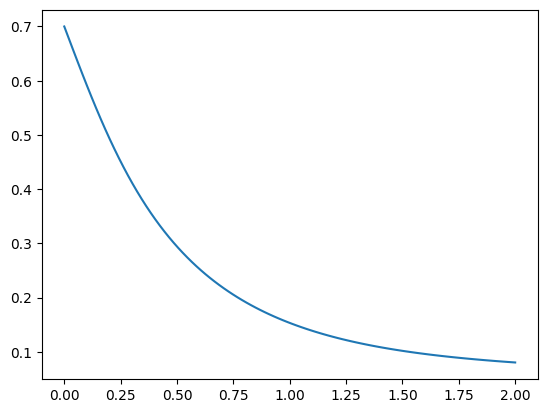

In [123]:
def fun_sin(Omega, z, c=1.0, a=0.8,b=0.2):
    f = a + b*np.sin(z)
    f_prim =  b*np.cos(z)
    Q = c**2/(Om0*(1+z)**3)*(H0**2)
    dOmega = - (Omega*(1-Omega)/(1+z))*((2*np.sqrt(Omega)/c)*((Q*(1-Omega)/Omega)**((f-1)/(2*(f-2))))*(2 - f)  + 2*f -  2 + (np.log(Q*(1-Omega)/Omega)**(-(1+z)*f_prim/(f-2))) )
    return dOmega




sol_prueba_sin = odeint(fun_sin,Ode0,z_rs)


plt.plot(z_rs,sol_prueba_sin)

In [141]:
arr_hub = np.loadtxt('/home/alfonsozapata/Documents/HolographicDE/HolographicDE/Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

sol_tri_re = sol_prueba_sin.reshape(-1)
sol_lin_re = sol_prueba_lin.reshape(-1)

# Define the parameters
Om = 0.3
Or = 0.0001
Ok = 0.0
Oe = 1 - Om - Or - Ok
H0 = 70

def RHSquared_z(z, sol_ode):
    return H0*np.sqrt((Or*(z + 1)**4 + Om*(z + 1)**3)/(1 - sol_ode))





hub_tri = RHSquared_z(z_rs,sol_tri_re)
hub_lin = RHSquared_z(z_rs,sol_lin_re)

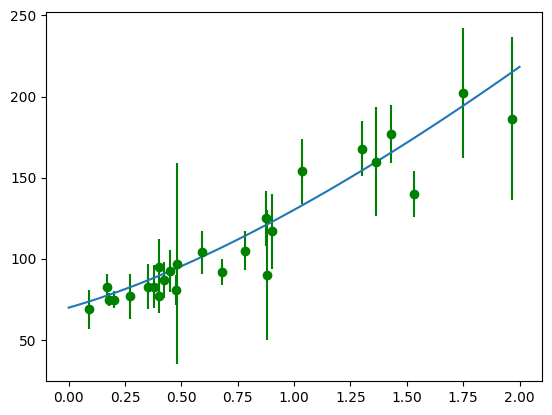

In [142]:
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.plot(z_rs,hub_lin)

In [ ]:



plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.plot(z_rs,hub_tri)